In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def load_all_pred_files():
    df = pd.DataFrame()
    for file in os.listdir():
        if file.startswith('preds_') and file.endswith('.csv'):
            df = pd.concat([df, pd.read_csv(file)])
    return df

df = load_all_pred_files()
df

,Model,Prediction,Actual,Deviation
0,Worst_2D,96.614189,82.0,14.614189
1,Worst_2D,128.024490,99.0,29.024490
2,Worst_2D,91.631378,70.0,21.631378
3,Worst_2D,133.372101,105.0,28.372101
4,Worst_2D,81.763969,50.0,31.763969
...,...,...,...,...
1756,Worst_Segmentaion,58.237830,68.0,9.762170
1757,Worst_Segmentaion,56.363140,17.0,-39.363140
1758,Worst_Segmentaion,88.346759,97.0,8.653241
1759,Worst_Segmentaion,104.737542,117.0,12.262458


In [3]:
deviation_df = pd.DataFrame()
for model in df['Model'].unique():
    # get the predictions for that model
    model_df = df[df['Model'] == model]
    # add models deviation to the deviation_df
    deviation_df = pd.concat([deviation_df, model_df['Deviation'].reset_index(drop=True)], axis=1)
deviation_df.columns = df['Model'].unique()
deviation_df


,Worst_2D,Mid_2D,Best_2D,Mid_3D,Worst_3D,Best_3D,Baseline,Best_Histogram,Mid_Histogram,Worst_Histogram,Best_Segmentaion,Mid_Segmentaion,Worst_Segmentaion
0,14.614189,-1.102875,-7.646965,6.795021,-14.871201,0.272758,5.722222,0.292079,-0.439579,-1.359930,-4.055166,-5.913197,-6.467959
1,29.024490,-9.116814,5.470955,-0.520699,-31.817802,1.740913,-21.000000,-9.972909,-3.323897,-16.905789,-4.399993,5.428322,13.855397
2,21.631378,-0.386909,7.676048,-4.410393,-12.411758,-5.401047,11.000000,-4.718323,-2.977818,0.379295,-7.433151,-8.211611,-7.835938
3,28.372101,-13.313263,-2.553123,-7.991737,-38.230766,-9.431625,-21.500000,3.969208,5.100932,6.070582,1.378434,4.843929,5.289903
4,31.763969,38.965958,11.743759,37.231682,10.172367,19.526909,-10.166667,-1.751567,-1.084768,-4.792818,-3.751537,-1.047652,-7.686812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,19.732414,-5.268845,-3.284660,-4.609154,-23.241760,-6.473518,6.442105,8.477544,11.292122,3.667630,10.644928,9.925364,9.762170
583,23.326042,1.313225,1.003868,5.472328,-14.095879,10.157043,170.000000,-38.580674,-30.399284,-32.200889,-32.464812,-30.395596,-39.363140
584,25.732719,4.541687,5.089722,8.890350,-13.389725,1.332962,-23.750000,1.842840,2.786275,3.698452,3.259592,10.690054,8.653241
585,26.873749,-6.054939,-4.888115,-18.182793,-39.645199,-7.373299,-50.000000,-0.078473,-1.763158,4.960039,5.810603,14.803882,12.262458


In [4]:
# order deviation_df my mean deviation
deviation_df = deviation_df.reindex(deviation_df.abs().mean().sort_values().index, axis=1)
deviation_df

,Best_Segmentaion,Best_Histogram,Mid_Histogram,Worst_Histogram,Best_2D,Mid_Segmentaion,Worst_Segmentaion,Best_3D,Mid_2D,Mid_3D,Baseline,Worst_3D,Worst_2D
0,-4.055166,0.292079,-0.439579,-1.359930,-7.646965,-5.913197,-6.467959,0.272758,-1.102875,6.795021,5.722222,-14.871201,14.614189
1,-4.399993,-9.972909,-3.323897,-16.905789,5.470955,5.428322,13.855397,1.740913,-9.116814,-0.520699,-21.000000,-31.817802,29.024490
2,-7.433151,-4.718323,-2.977818,0.379295,7.676048,-8.211611,-7.835938,-5.401047,-0.386909,-4.410393,11.000000,-12.411758,21.631378
3,1.378434,3.969208,5.100932,6.070582,-2.553123,4.843929,5.289903,-9.431625,-13.313263,-7.991737,-21.500000,-38.230766,28.372101
4,-3.751537,-1.751567,-1.084768,-4.792818,11.743759,-1.047652,-7.686812,19.526909,38.965958,37.231682,-10.166667,10.172367,31.763969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,10.644928,8.477544,11.292122,3.667630,-3.284660,9.925364,9.762170,-6.473518,-5.268845,-4.609154,6.442105,-23.241760,19.732414
583,-32.464812,-38.580674,-30.399284,-32.200889,1.003868,-30.395596,-39.363140,10.157043,1.313225,5.472328,170.000000,-14.095879,23.326042
584,3.259592,1.842840,2.786275,3.698452,5.089722,10.690054,8.653241,1.332962,4.541687,8.890350,-23.750000,-13.389725,25.732719
585,5.810603,-0.078473,-1.763158,4.960039,-4.888115,14.803882,12.262458,-7.373299,-6.054939,-18.182793,-50.000000,-39.645199,26.873749


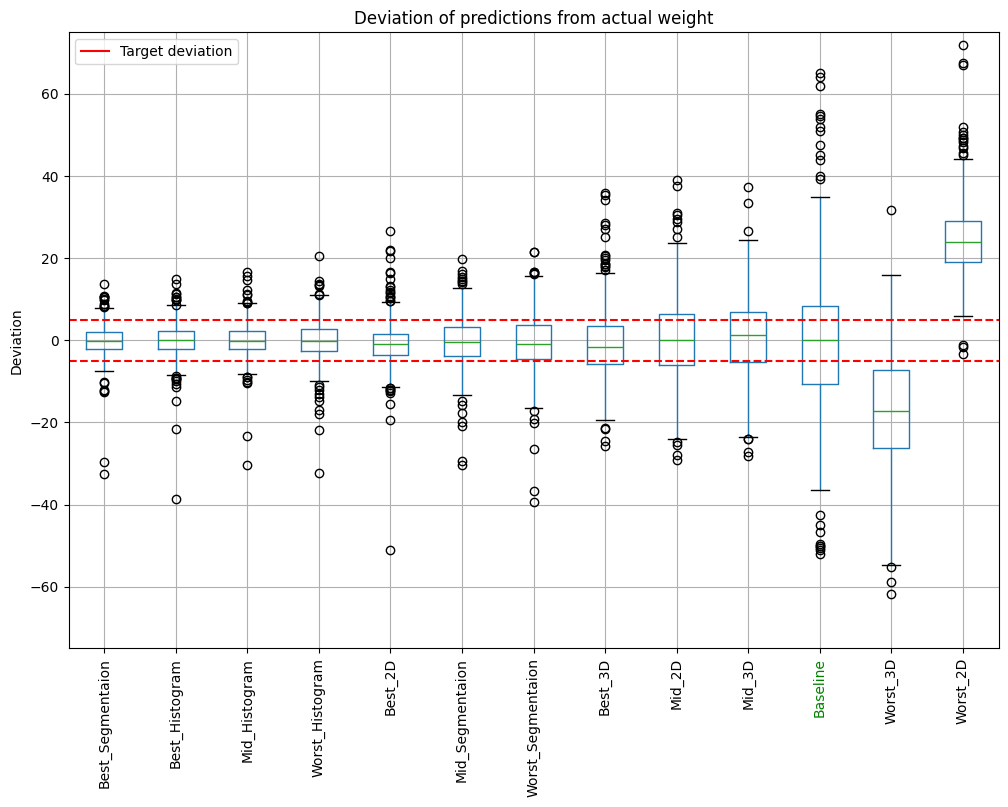

In [68]:
# Create a boxplot of all columns in deviation_df
deviation_df.boxplot(rot=90, figsize=(12,8))
# Draw a horizontal line at +-5
plt.axhline(y=5, color='r', linestyle='--')
plt.axhline(y=-5, color='r', linestyle='--')

# Color the baseline boxplot a different color
plt.setp(plt.gca().get_xticklabels()[10], color='g')
plt.ylabel('Deviation')
# limit y-axis to -100 to 100
plt.ylim(-75, 75)

# set title
plt.title('Deviation of predictions from actual weight')

# manually add red line to legend with text "Target deviation"
plt.plot([], c='r', label='Target deviation')
plt.legend()

plt.savefig('Boxplot_all.png', bbox_inches='tight', dpi=300, transparent=False, pad_inches=0.1)
plt.show()

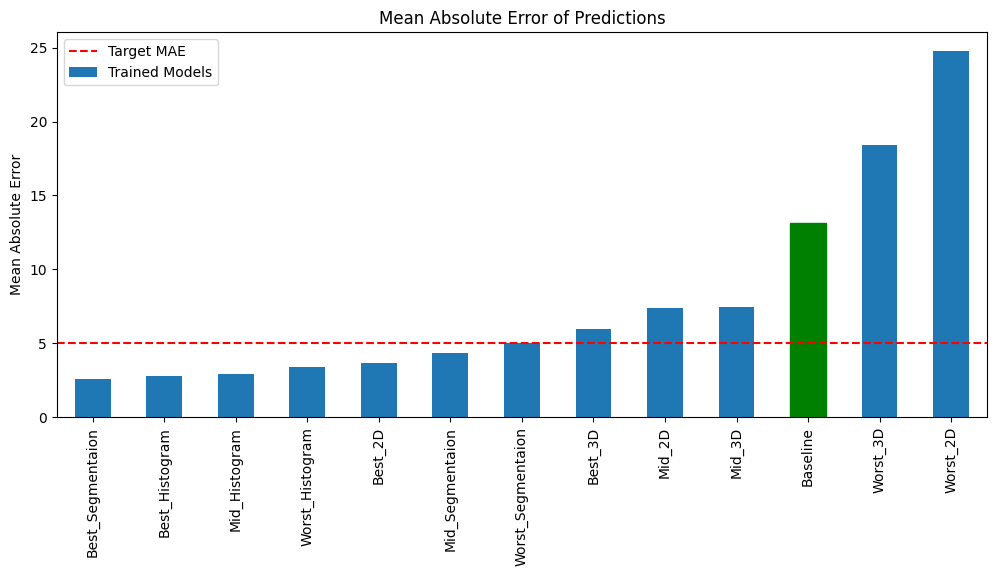

In [41]:
# Barplot the Mean Absolute Deviation
deviation_df.abs().mean().plot(kind='bar', figsize=(12, 5))
# Draw a horizontal line at 5
plt.axhline(y=5, color='r', linestyle='--')

# Color baseline bar green
plt.gca().get_children()[10].set_color('g')

# Set title
plt.title('Mean Absolute Error of Predictions')

# Add y label MAE
plt.ylabel('Mean Absolute Error')

# Add legend green for baseline, red for target MAE of 5 and blue for trained models
plt.legend(['Target MAE', 'Trained Models'])

plt.savefig('MAE_all.png', bbox_inches='tight', dpi=300, transparent=False, pad_inches=0.1)
plt.show()

In [7]:
deviation_limited_df = pd.DataFrame()
for model in df['Model'].unique():
    # get the predictions for that model and Actual > 50 and Actual < 100
    model_df = df[df['Model'] == model]
    model_df = model_df[(model_df['Actual'] >= 50) & (model_df['Actual'] <= 110)]
    deviation_limited_df = pd.concat([deviation_limited_df, model_df['Deviation'].reset_index(drop=True)], axis=1)

deviation_limited_df.columns = df['Model'].unique()
deviation_limited_df

,Worst_2D,Mid_2D,Best_2D,Mid_3D,Worst_3D,Best_3D,Baseline,Best_Histogram,Mid_Histogram,Worst_Histogram,Best_Segmentaion,Mid_Segmentaion,Worst_Segmentaion
0,14.614189,-1.102875,-7.646965,6.795021,-14.871201,0.272758,5.722222,0.292079,-0.439579,-1.359930,-4.055166,-5.913197,-6.467959
1,29.024490,-9.116814,5.470955,-0.520699,-31.817802,1.740913,-21.000000,-9.972909,-3.323897,-16.905789,-4.399993,5.428322,13.855397
2,21.631378,-0.386909,7.676048,-4.410393,-12.411758,-5.401047,11.000000,-4.718323,-2.977818,0.379295,-7.433151,-8.211611,-7.835938
3,28.372101,-13.313263,-2.553123,-7.991737,-38.230766,-9.431625,-21.500000,3.969208,5.100932,6.070582,1.378434,4.843929,5.289903
4,31.763969,38.965958,11.743759,37.231682,10.172367,19.526909,-10.166667,-1.751567,-1.084768,-4.792818,-3.751537,-1.047652,-7.686812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,19.732414,-5.268845,-3.284660,-4.609154,-23.241760,-6.473518,-17.000000,0.200332,1.723810,0.710384,3.243534,14.179381,15.302357
558,23.326042,1.313225,1.003868,5.472328,-14.095879,10.157043,-16.500000,0.464140,2.289901,-0.241432,-0.272997,4.667507,2.545841
559,25.732719,4.541687,5.089722,8.890350,-13.389725,1.332962,6.442105,8.477544,11.292122,3.667630,10.644928,9.925364,9.762170
560,26.873749,-6.054939,-4.888115,-18.182793,-39.645199,-7.373299,-23.750000,1.842840,2.786275,3.698452,3.259592,10.690054,8.653241


In [8]:
# order deviation_df my mean deviation
deviation_limited_df = deviation_limited_df.reindex(deviation_limited_df.abs().mean().sort_values().index, axis=1)
deviation_limited_df

,Best_Segmentaion,Best_Histogram,Mid_Histogram,Worst_Histogram,Best_2D,Mid_Segmentaion,Worst_Segmentaion,Best_3D,Mid_2D,Mid_3D,Baseline,Worst_3D,Worst_2D
0,-4.055166,0.292079,-0.439579,-1.359930,-7.646965,-5.913197,-6.467959,0.272758,-1.102875,6.795021,5.722222,-14.871201,14.614189
1,-4.399993,-9.972909,-3.323897,-16.905789,5.470955,5.428322,13.855397,1.740913,-9.116814,-0.520699,-21.000000,-31.817802,29.024490
2,-7.433151,-4.718323,-2.977818,0.379295,7.676048,-8.211611,-7.835938,-5.401047,-0.386909,-4.410393,11.000000,-12.411758,21.631378
3,1.378434,3.969208,5.100932,6.070582,-2.553123,4.843929,5.289903,-9.431625,-13.313263,-7.991737,-21.500000,-38.230766,28.372101
4,-3.751537,-1.751567,-1.084768,-4.792818,11.743759,-1.047652,-7.686812,19.526909,38.965958,37.231682,-10.166667,10.172367,31.763969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,3.243534,0.200332,1.723810,0.710384,-3.284660,14.179381,15.302357,-6.473518,-5.268845,-4.609154,-17.000000,-23.241760,19.732414
558,-0.272997,0.464140,2.289901,-0.241432,1.003868,4.667507,2.545841,10.157043,1.313225,5.472328,-16.500000,-14.095879,23.326042
559,10.644928,8.477544,11.292122,3.667630,5.089722,9.925364,9.762170,1.332962,4.541687,8.890350,6.442105,-13.389725,25.732719
560,3.259592,1.842840,2.786275,3.698452,-4.888115,10.690054,8.653241,-7.373299,-6.054939,-18.182793,-23.750000,-39.645199,26.873749


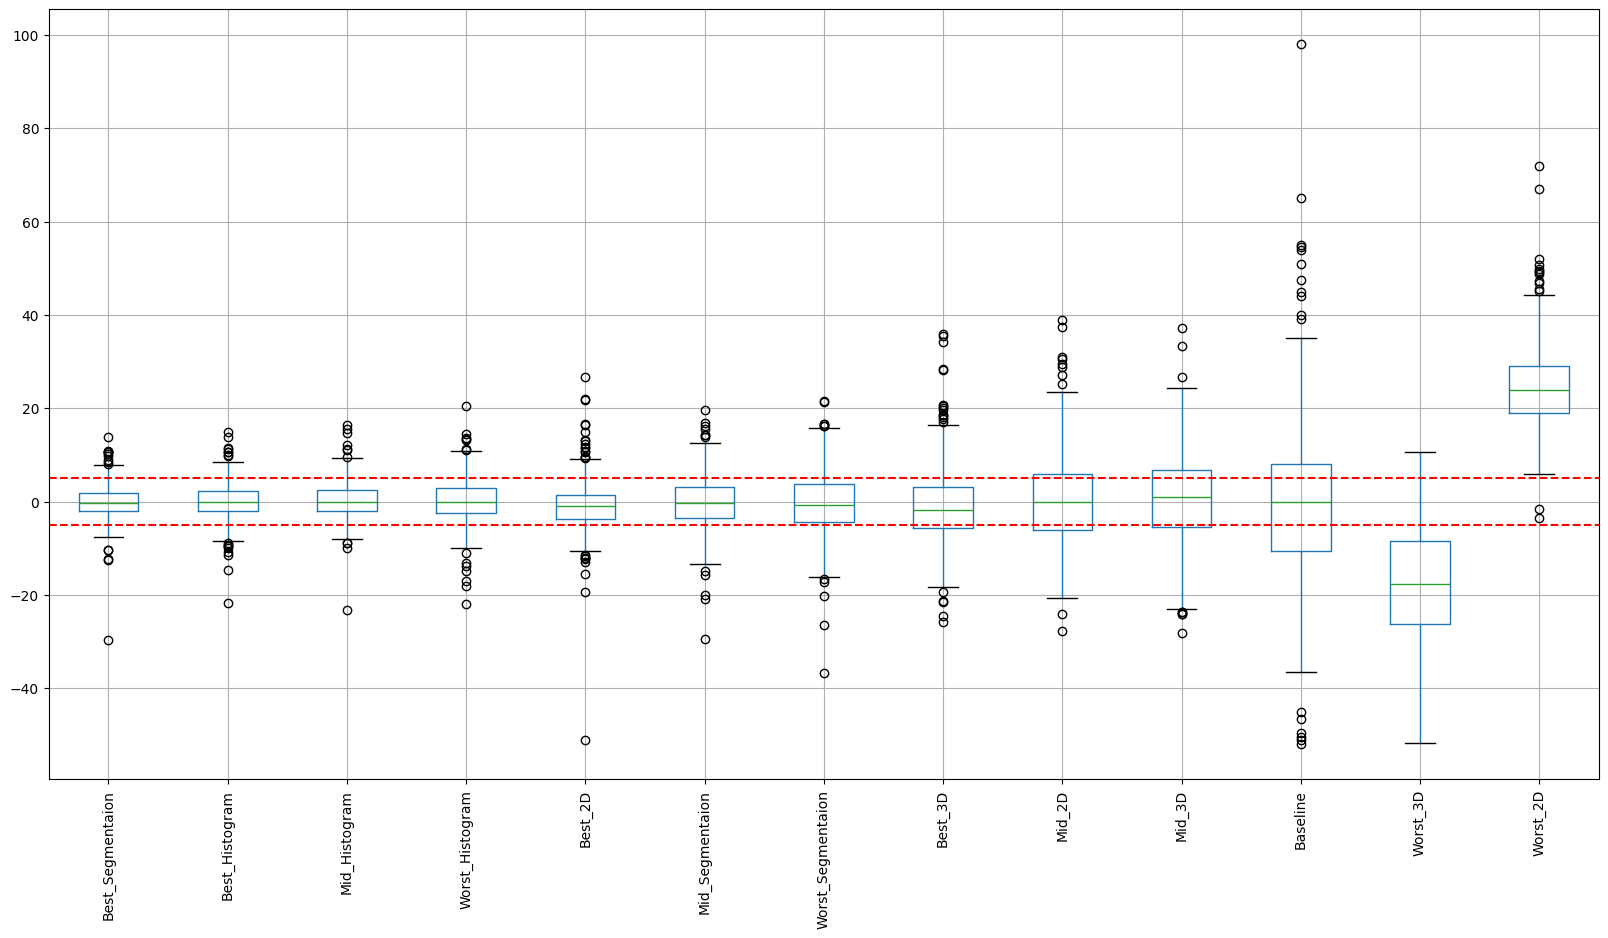

In [9]:
# Create a boxplot of all columns in deviation_df
deviation_limited_df.boxplot(rot=90, figsize=(20,10))
# Draw a horizontal line at +-5
plt.axhline(y=5, color='r', linestyle='--')
plt.axhline(y=-5, color='r', linestyle='--')

plt.show()

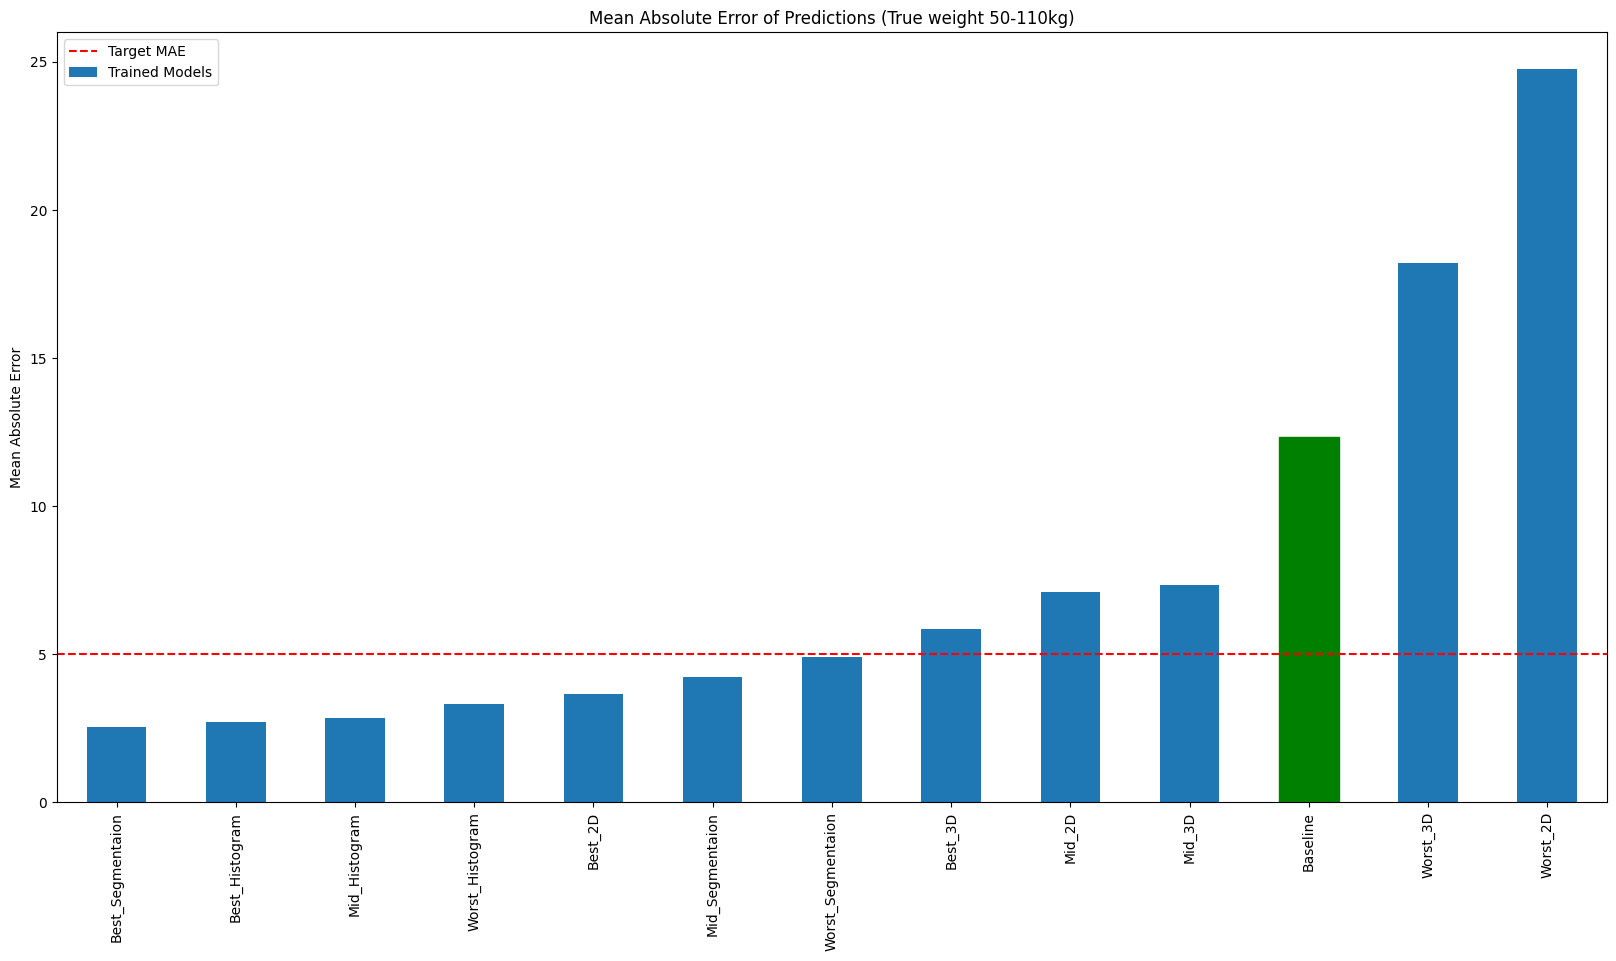

In [46]:
# Barplot the Mean Absolute Deviation
deviation_limited_df.abs().mean().plot(kind='bar', figsize=(20,10))
# Draw a horizontal line at 5
plt.axhline(y=5, color='r', linestyle='--')


# Color baseline bar green
plt.gca().get_children()[10].set_color('g')

# Set title
plt.title('Mean Absolute Error of Predictions (True weight 50-110kg)')

# Add y label MAE
plt.ylabel('Mean Absolute Error')

# Add legend green for baseline, red for target MAE of 5 and blue for trained models
plt.legend(['Target MAE', 'Trained Models'])

plt.savefig('MAE_limited.png', bbox_inches='tight', dpi=300, transparent=False, pad_inches=0.1)

plt.show()

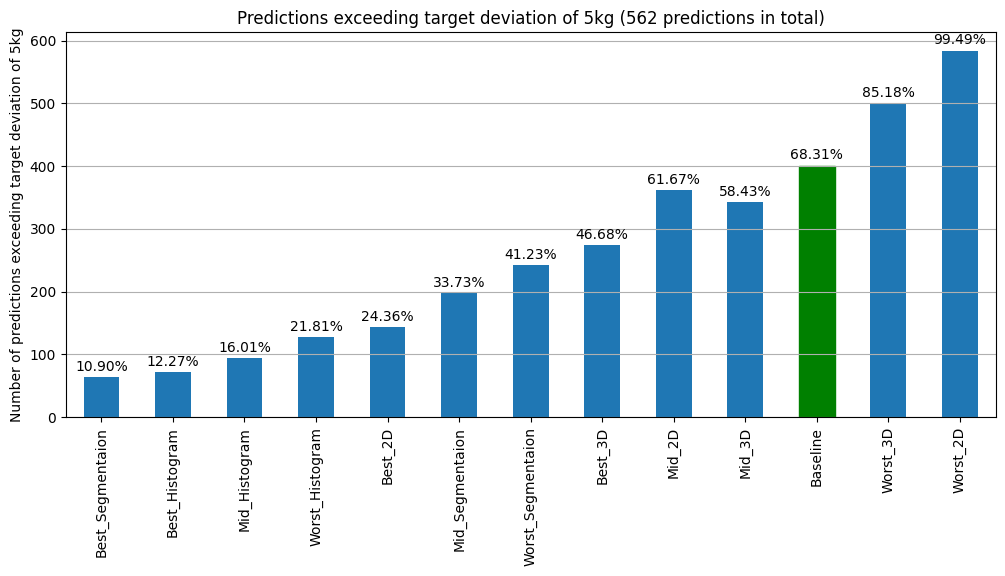

In [71]:
# count all deviation_df values that are greater than 5
count = deviation_df[deviation_df.abs() > 5].count()

count.plot(kind='bar', figsize=(12,5))
# Add percentage values to the bars
for i, v in enumerate(count):
    plt.text(i, v + 10, f"{v / deviation_df.shape[0] * 100:.2f}%", ha='center')

# Set title
plt.title('Predictions exceeding target deviation of 5kg (562 predictions in total)')

plt.gca().get_children()[10].set_color('g')
# Add y label "Number of predictions exceeding target deviation of 5"
plt.ylabel('Number of predictions exceeding target deviation of 5kg')

# Gridlines
plt.grid(axis='y')

plt.savefig('Exceeding_5kg.png', bbox_inches='tight', dpi=300, transparent=False, pad_inches=0.1)
plt.show()

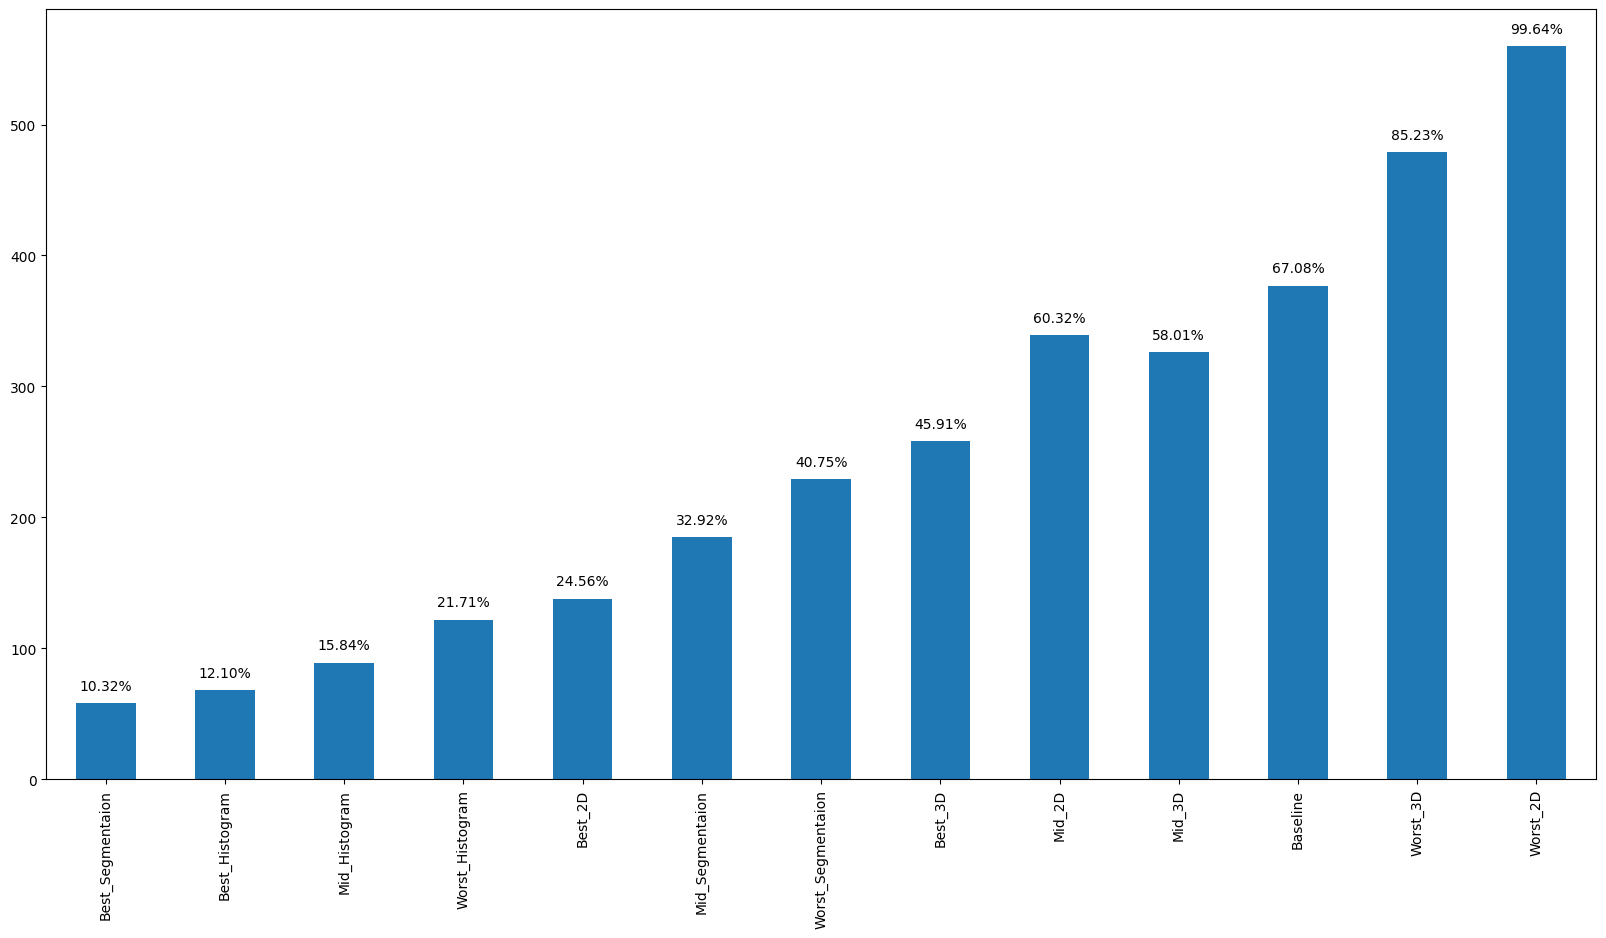

In [12]:
# count all deviation_limited_df values that are greater than 5
count = deviation_limited_df[deviation_limited_df.abs() > 5].count()

count.plot(kind='bar', figsize=(20,10))
# Add percentage values to the bars
for i, v in enumerate(count):
    plt.text(i, v + 10, f"{v / deviation_limited_df.shape[0] * 100:.2f}%", ha='center')


plt.show()